In [4]:
import os
from skimage import io, img_as_float
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
%matplotlib inline
from matplotlib.patches import Rectangle
import numpy as np
import utils as utl

p03 = lambda x: np.percentile(x,3)
p97 = lambda x: np.percentile(x,97)
clip397 = lambda x: np.clip(x,p03(x),p97(x))

def get_img_list(patient, typ, datapath):
    images = []
    bboxes = []
    for file in os.listdir(datapath):
        if (".jpg" in file) and (typ in file) and (file.startswith(patient) and ("avg" not in file)):
            img = io.imread(datapath+file)
            images.append(img)
        if (".txt" in file) and (typ in file) and (file.startswith(patient)):
            with open(datapath+file,"r") as f: bbx = f.read()
            bbx = [int(float(i)*800) for i in bbx.split()]
            bboxes.append(bbx)
    return images, bboxes

def bbx_viz(image, bbx, img_name, axis):
    """
    expects that the bbox is in xymiwh format, size of image is 800x800
    """
#     fig1, ax1 = plt.subplots(figsize = figs)
    # Rectangle takes bottom-left coords (bottom in terms of data coordinates, as the y axis is flipped, its top left visually)
    bottom_left = (bbx[0]-bbx[2]/2.,bbx[1]-bbx[3]/2.)
    axis.add_patch(Rectangle(xy=bottom_left, width=bbx[2], height=bbx[3],linewidth=1,edgecolor='r',facecolor='none'))
    axis.imshow(image, cmap = "gray")
    axis.set_title(img_name,fontsize=18)

In [10]:
raw_path = "raw_data/bleeding_cases/"
import utils as ut

train_patients = [15,	47,	58,	61,	68,	71,	12,	17,	24,	35,	40,	63,	67,	6,	20,	42,	50,	74,	75,	44,	64,	5,	49,	51,	54,	56,	66,	73]
test_patients = [1,18,48,60, 72]
new_test = [62, 76, 77, 78, 79, 80, 81, 82, 83]

In [12]:
for pfolder in os.listdir(raw_path):
	images_p = os.listdir(raw_path+pfolder)
	for fname in images_p:
		patient = int(fname.split("_")[0])
		pathtopatientfile = raw_path+pfolder+"/"+fname
		if (".csv" in fname) & (fname[:-4]+".tif" in images_p):
			### read image abd bbx
			img = io.imread(pathtopatientfile[:-4]+".tif")
			mwhlist = ut.read_bbox(pathtopatientfile[:-4]+".csv")
			bxmin,bymin,bxmax,bymax = [max(i) for i in zip(*[ut.mid2ltrb(mwh) for mwh in mwhlist])]

			# #######################################################################
			# ### dump with bbox drawn on top the images
			# #######################################################################
			# lbwhlist = [ut.mid2lb(mwh) for mwh in mwhlist] ### convert to lbwh format required by matplolib Rectangle
			# plt.imshow(img, cmap="gray")
			# for lbwh in lbwhlist:
			# 	ut.draw_rect(plt.gca(), lbwh)
			# plt.savefig(ver1_path+fname[:-4]+".jpg")
			# plt.close()

			#######################################################################
			### dump the 800x800 train/test data with augmentations
			#######################################################################
			if patient not in train_patients+test_patients+new_test:
				continue
			# sizeproblem = [47, 49, 50]

			right_crop = bxmax <= 800
			bot_crop = bymax <= 800
			if right_crop and bot_crop:
				continue
			print(bxmin,bymin,bxmax,bymax)

623 873 740 927
554 845 743 920
582 842 738 917
570 855 750 921
437 783 746 927
434 777 731 927
447 776 753 917
450 771 714 921
450 759 726 927
450 768 720 918
452 767 719 920
446 759 719 927
447 767 735 920
443 761 722 938
455 758 728 929
447 764 735 917
204 684 290 900
224 698 276 850
220 694 274 864
216 760 260 890
220 684 282 894
208 688 284 894
238 624 306 824
236 620 312 830
234 626 310 826
245 602 580 820
248 628 575 808
250 634 578 810
0 0 1000 1000


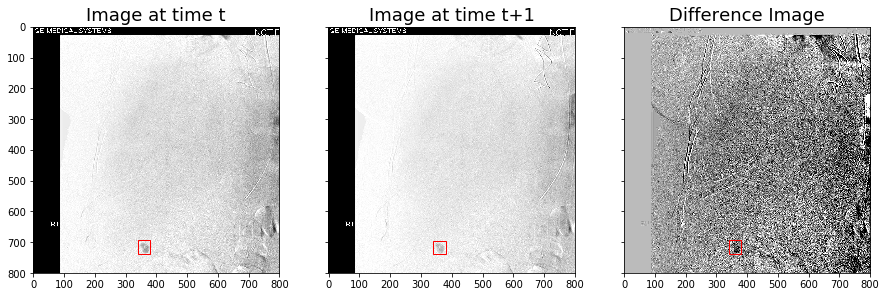

In [3]:
imglist, bbxlist = get_img_list("60_", "orig", "proc_versions/clip_img/")

fig1,axs = plt.subplots(1, 3, sharey=True, figsize=(15,10))
bbx_viz(clip397(imglist[-1]), bbxlist[-1], "Image at time t", axs[0])
bbx_viz(clip397(imglist[-2]), bbxlist[-2], "Image at time t+1", axs[1])
bbx_viz(clip397(imglist[-1].astype('int64')-imglist[-2].astype('int64')), bbxlist[-1], "Difference Image", axs[2])

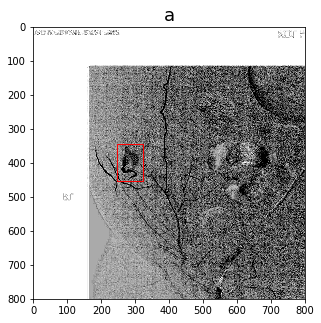

In [16]:
imglist, bbxlist = get_img_list("01_", "orig", "proc_versions/clip_img/")
aggdiff = np.zeros((800,800),dtype='float64')

for i in range(len(imglist)):
    if i==0:
        continue
    img_curr = np.array(imglist[i], dtype="float64")
    img_prev = np.array(imglist[i-1], dtype="float64")    
    img_curr = clip397(img_curr)
    img_prev = clip397(img_prev)
    
    diff = img_curr - img_prev
    diff[diff>0] *= 1
    diff[diff<=0] *= 5
    aggdiff += clip397(diff)

aggdiff = clip397(aggdiff)

fig1,axs = plt.subplots(1, 1, sharey=True, figsize=(5,5))
bbx_viz(aggdiff,bbxlist[-1], "a", axs)

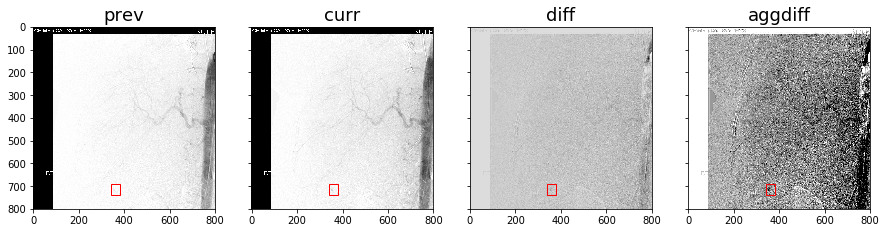

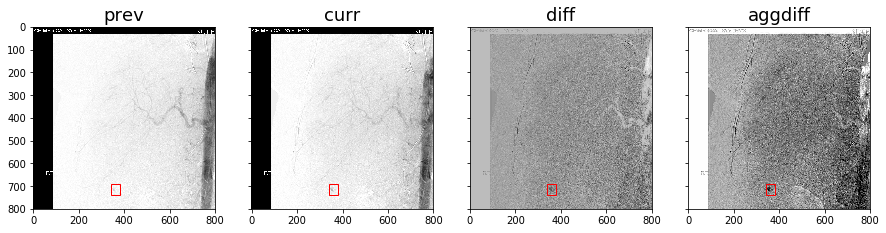

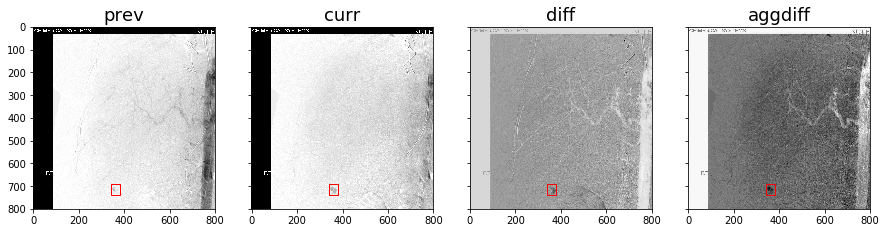

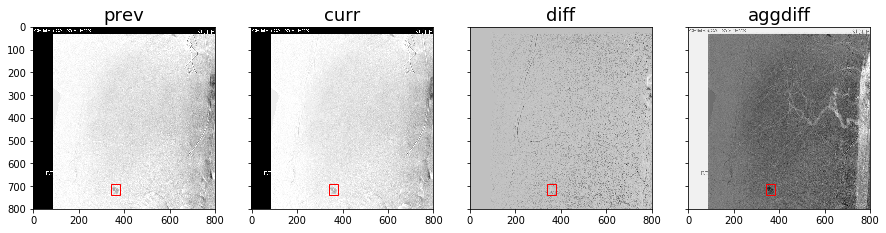

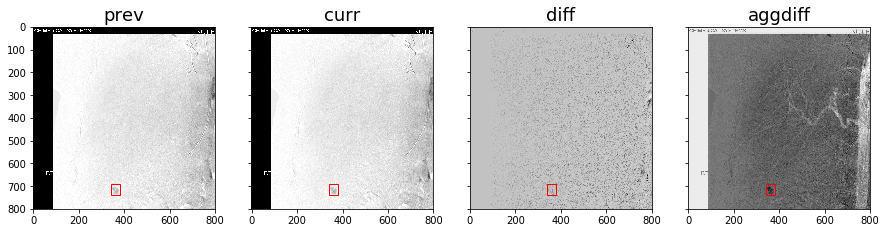

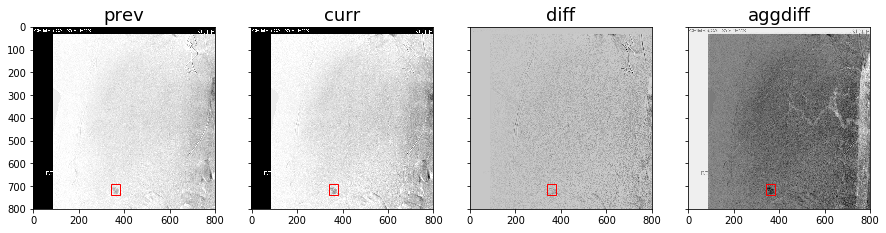

In [15]:
imglist, bbxlist = get_img_list("60_", "orig", "proc_versions/clip_img/")
aggdiff = np.zeros((800,800),dtype='float64')

for i in range(len(imglist)):
    if i==0:
        continue
    img_curr = np.array(imglist[i], dtype="float64")
    img_prev = np.array(imglist[i-1], dtype="float64")    
    img_curr = clip397(img_curr)
    img_prev = clip397(img_prev)
    
    diff = img_curr - img_prev
    diff[diff>0] *= 1
    diff[diff<=0] *= 5
    aggdiff += clip397(diff)

    fig1,axs = plt.subplots(1, 4, sharey=True, figsize=(15,5))
    bbx_viz(img_prev, bbxlist[-1], "prev", axs[0])
    bbx_viz(img_curr, bbxlist[-1], "curr", axs[1])
    bbx_viz(diff, bbxlist[-1], "diff", axs[2])
    bbx_viz(aggdiff, bbxlist[-1], "aggdiff", axs[3])

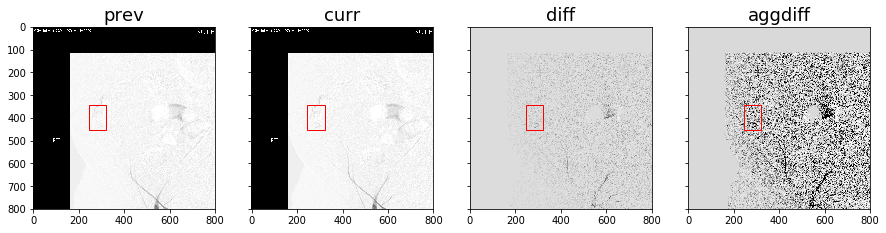

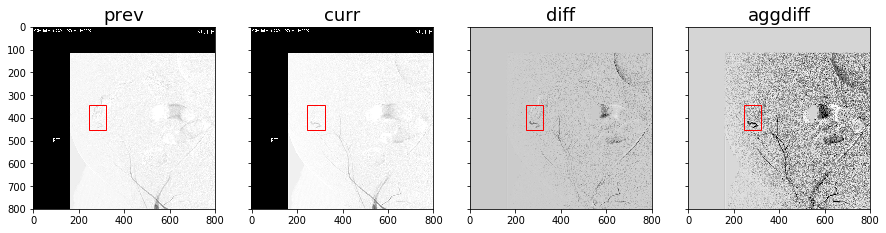

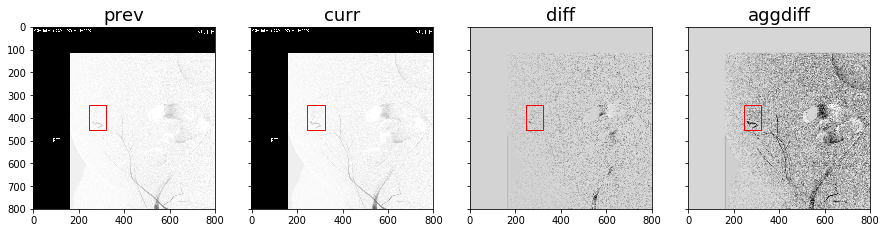

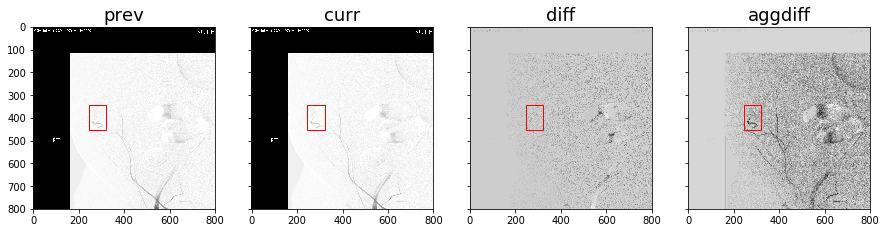

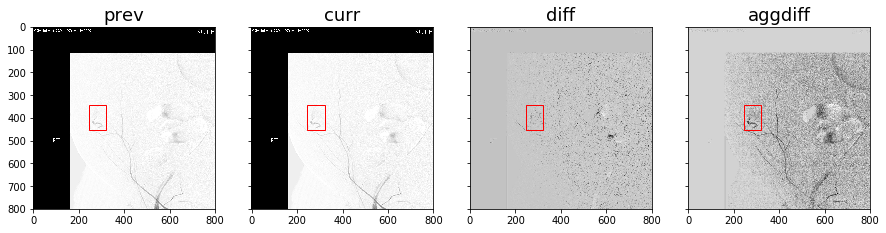

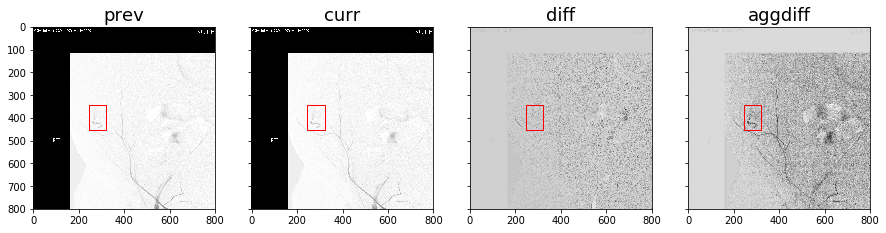

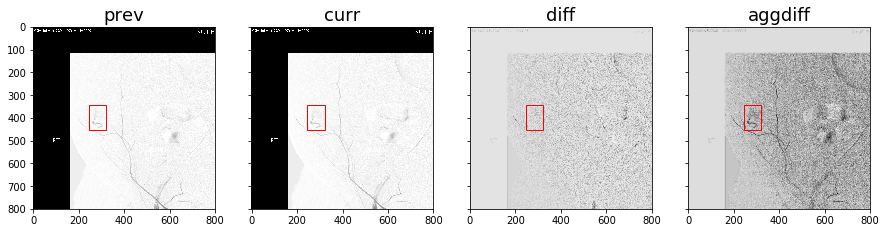

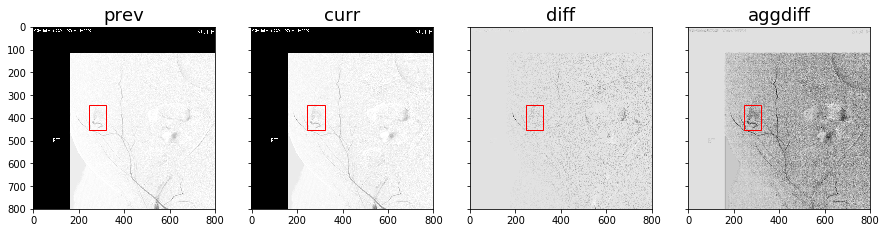

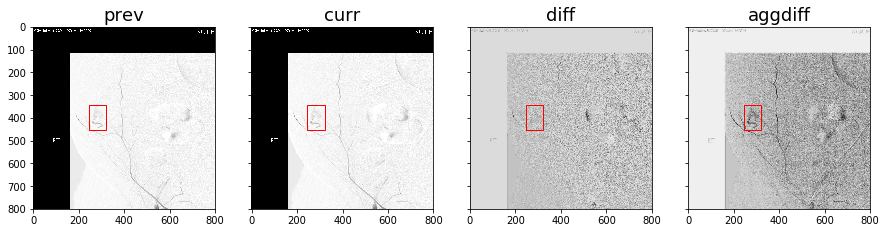

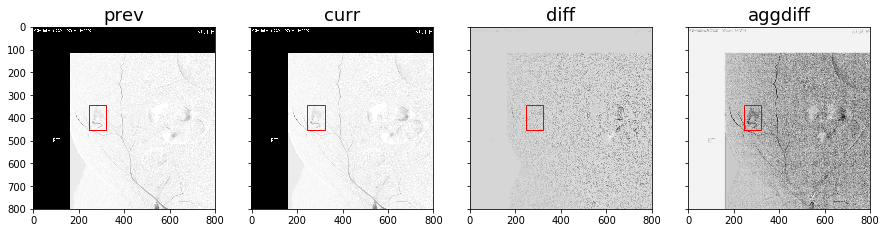

In [17]:
imglist, bbxlist = get_img_list("01_", "orig", "proc_versions/clip_img/")
aggdiff = np.zeros((800,800),dtype='float64')

for i in range(len(imglist)):
    if i==0:
        continue
    img_curr = np.array(imglist[i], dtype="float64")
    img_prev = np.array(imglist[i-1], dtype="float64")    
    img_curr = clip397(img_curr)
    img_prev = clip397(img_prev)
    
    diff = img_curr - img_prev
    diff[diff>0] *= 1
    diff[diff<=0] *= 5
    aggdiff += clip397(diff)

    fig1,axs = plt.subplots(1, 4, sharey=True, figsize=(15,5))
    bbx_viz(img_prev, bbxlist[-1], "prev", axs[0])
    bbx_viz(img_curr, bbxlist[-1], "curr", axs[1])
    bbx_viz(diff, bbxlist[-1], "diff", axs[2])
    bbx_viz(aggdiff, bbxlist[-1], "aggdiff", axs[3])

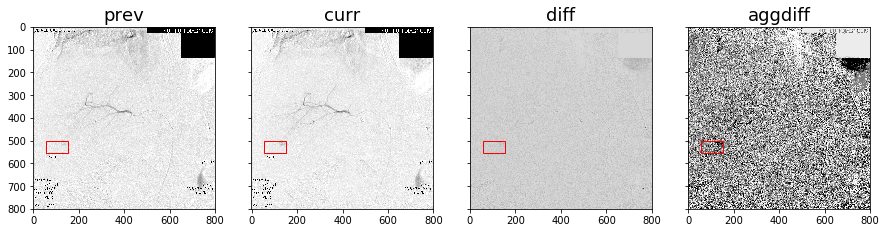

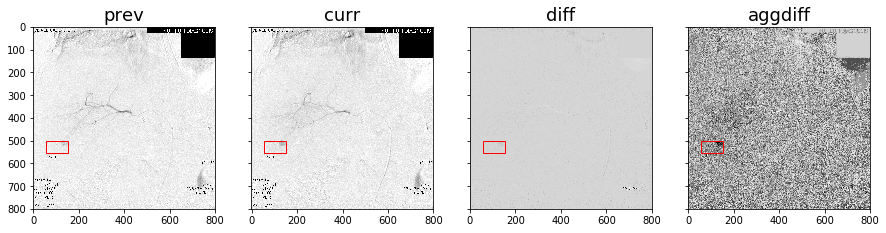

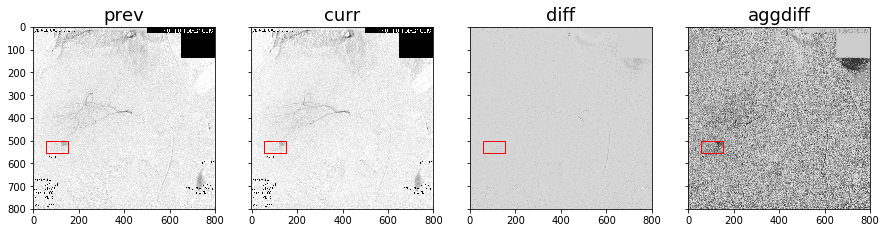

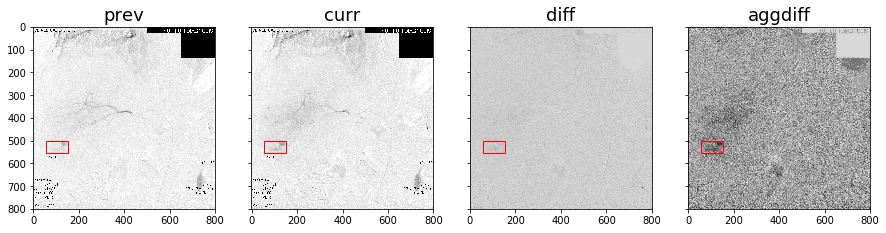

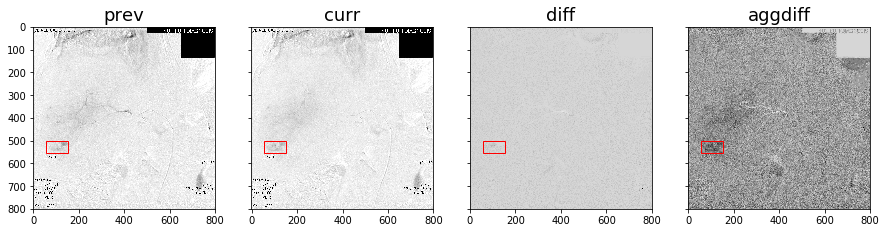

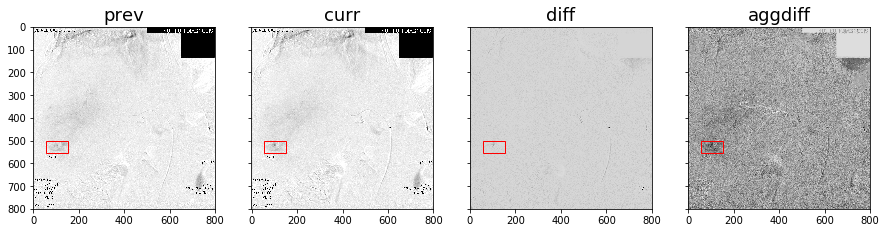

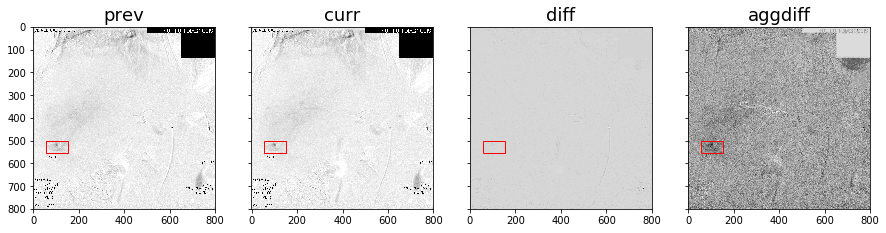

In [18]:
imglist, bbxlist = get_img_list("18_", "orig", "proc_versions/clip_img/")
aggdiff = np.zeros((800,800),dtype='float64')

for i in range(len(imglist)):
    if i==0:
        continue
    img_curr = np.array(imglist[i], dtype="float64")
    img_prev = np.array(imglist[i-1], dtype="float64")    
    img_curr = clip397(img_curr)
    img_prev = clip397(img_prev)
    
    diff = img_curr - img_prev
    diff[diff>0] *= 1
    diff[diff<=0] *= 5
    aggdiff += clip397(diff)

    fig1,axs = plt.subplots(1, 4, sharey=True, figsize=(15,5))
    bbx_viz(img_prev, bbxlist[-1], "prev", axs[0])
    bbx_viz(img_curr, bbxlist[-1], "curr", axs[1])
    bbx_viz(diff, bbxlist[-1], "diff", axs[2])
    bbx_viz(aggdiff, bbxlist[-1], "aggdiff", axs[3])

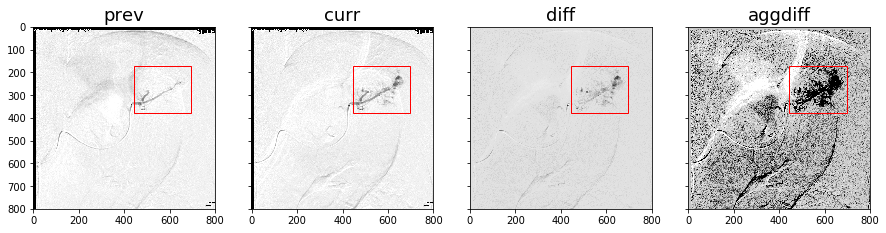

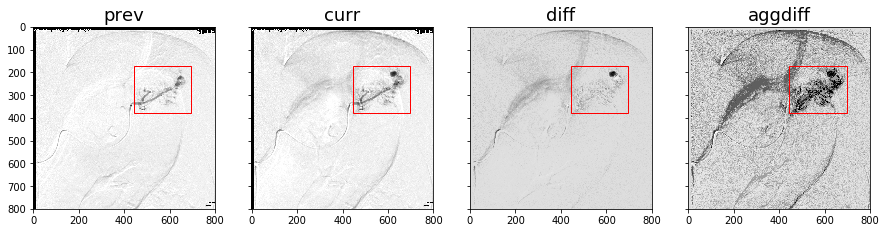

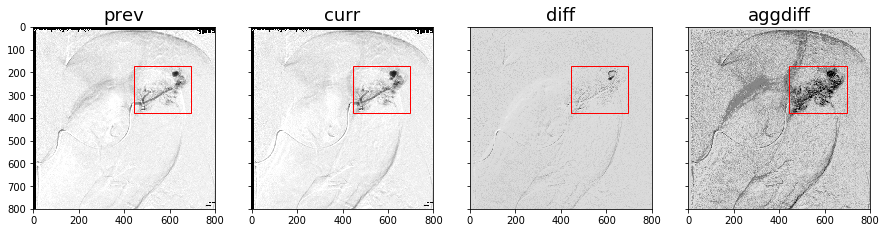

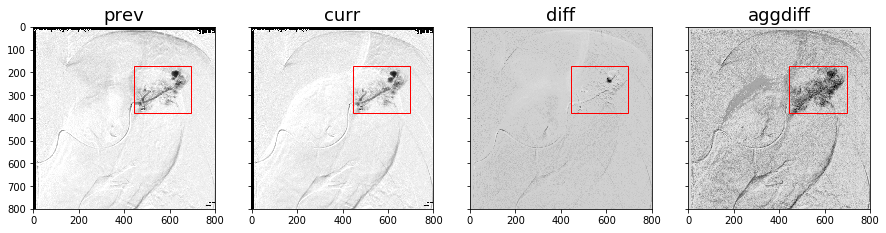

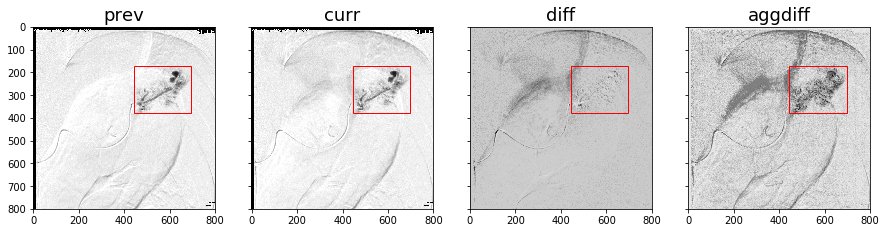

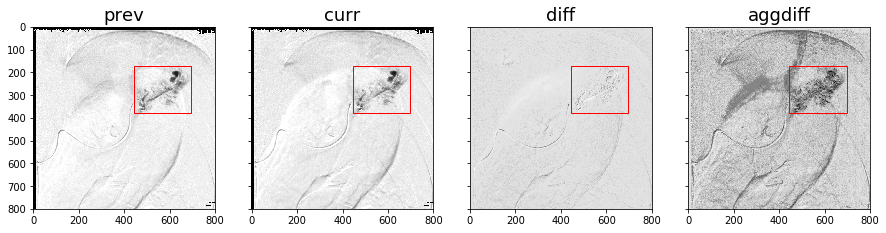

In [19]:
imglist, bbxlist = get_img_list("72_", "orig", "proc_versions/clip_img/")
aggdiff = np.zeros((800,800),dtype='float64')

for i in range(len(imglist)):
    if i==0:
        continue
    img_curr = np.array(imglist[i], dtype="float64")
    img_prev = np.array(imglist[i-1], dtype="float64")    
    img_curr = clip397(img_curr)
    img_prev = clip397(img_prev)
    
    diff = img_curr - img_prev
    diff[diff>0] *= 1
    diff[diff<=0] *= 5
    aggdiff += clip397(diff)

    fig1,axs = plt.subplots(1, 4, sharey=True, figsize=(15,5))
    bbx_viz(img_prev, bbxlist[-1], "prev", axs[0])
    bbx_viz(img_curr, bbxlist[-1], "curr", axs[1])
    bbx_viz(diff, bbxlist[-1], "diff", axs[2])
    bbx_viz(aggdiff, bbxlist[-1], "aggdiff", axs[3])
#     bbx_viz(aggdiff, bbxlist[-1], "aggdiff", axs[3])

1 416435.606825
2 417557.032175
3 421330.6711015625
4 430265.0325015625
5 448021.4543765625
6 478536.9050015625
7 526338.3186046875
8 597803.0834046875
9 697105.662546875
10 832592.185984375


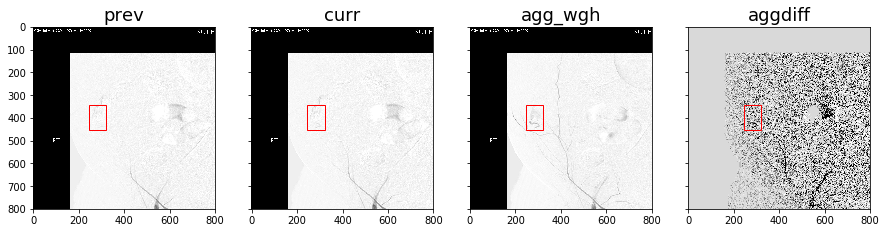

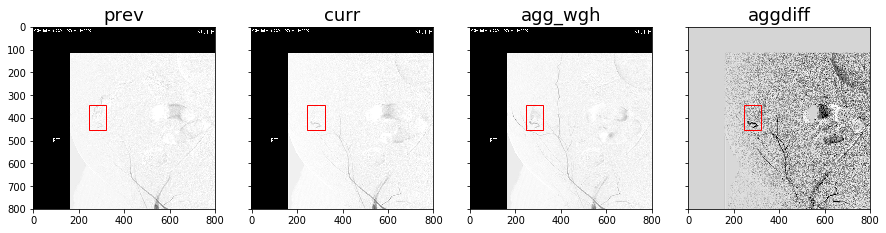

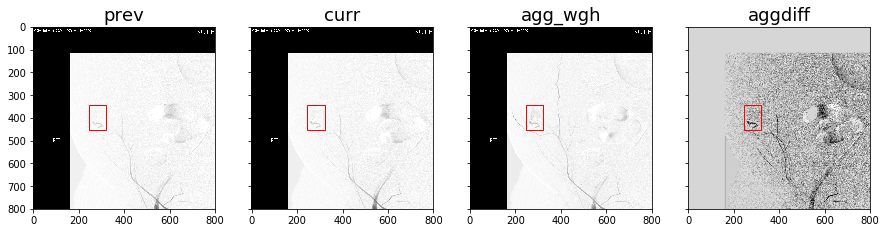

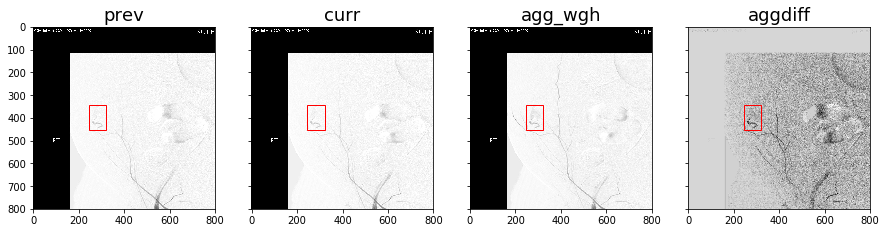

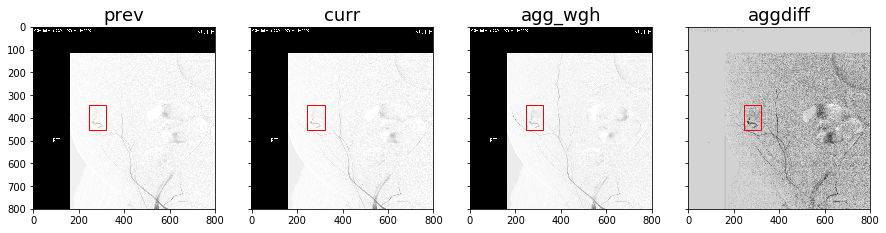

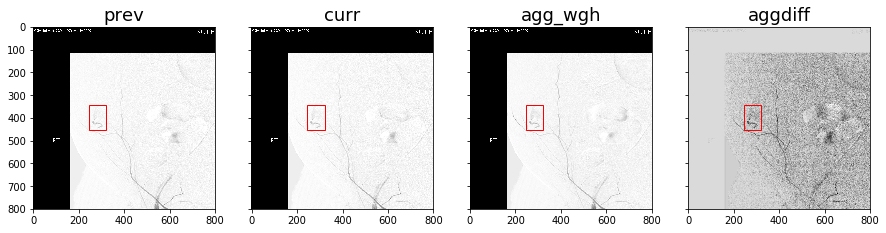

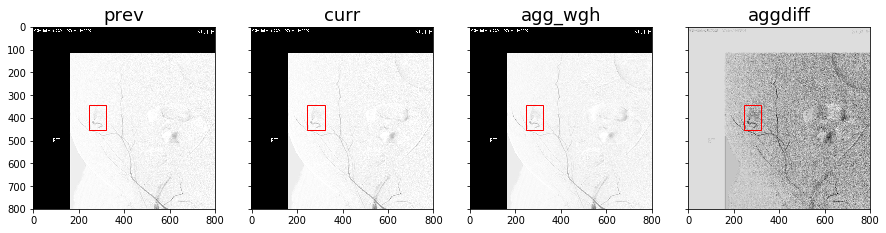

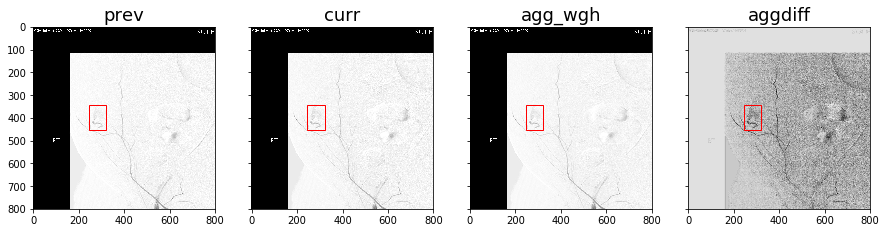

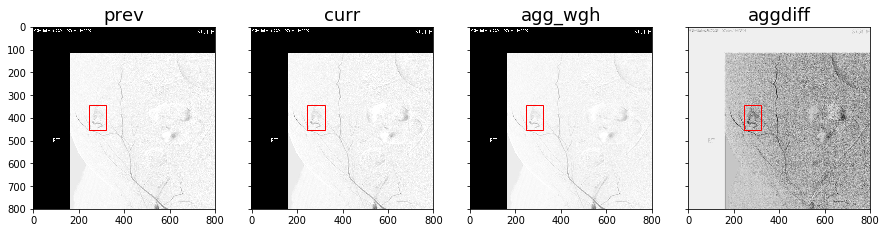

In [ ]:
imglist, bbxlist = get_img_list("01_", "orig", "proc_versions/clip_img/")
aggdiff = np.zeros((800,800),dtype='float64')
aggimg_wgh = np.zeros((800,800),dtype="float64")
for i in range(len(imglist)):
    if i==0:
        continue
    img_curr = np.array(imglist[i], dtype="float64")
    img_prev = np.array(imglist[i-1], dtype="float64")    
    img_curr = clip397(img_curr)
    img_prev = clip397(img_prev)
    aggimg_wgh = aggimg_wgh + (i)**3*img_curr
    print(i, aggimg_wgh.mean())
    
    diff = img_curr - img_prev
    diff[diff>0] *= 1
    diff[diff<=0] *= 5
    aggdiff += clip397(diff)

    fig1,axs = plt.subplots(1, 4, sharey=True, figsize=(15,5))
    bbx_viz(img_prev, bbxlist[-1], "prev", axs[0])
    bbx_viz(img_curr, bbxlist[-1], "curr", axs[1])
    bbx_viz(aggimg_wgh, bbxlist[-1], "agg_wgh", axs[2])
    bbx_viz(aggdiff, bbxlist[-1], "aggdiff", axs[3])

In [7]:
new_test = [62, 76, 77, 78, 79, 80, 81, 82, 83]

In [7]:
print([15,	47,	58,	61,	68,	71,	12,	17,	24,	35,	40,	63,	67,	6,	20,	42,	50,	74,	75,	44,	64,	5,	49,	51,	54,	56,	66,	73])

[15, 47, 58, 61, 68, 71, 12, 17, 24, 35, 40, 63, 67, 6, 20, 42, 50, 74, 75, 44, 64, 5, 49, 51, 54, 56, 66, 73]


In [5]:
for j in [15, 47, 58, 61, 68, 71, 12, 17, 24, 35, 40]:#, 63, 67, 6, 20, 42, 50, 74, 75, 44, 64, 5, 49, 51, 54, 56, 66, 73]:
    imglist, bbxlist = get_img_list(("0"+str(j))[-2:]+"_", "orig", "proc_versions/clip_img/")
    aggdiff = np.zeros((800,800),dtype='float64')
    aggimg_wgh = np.zeros((800,800),dtype="float64")
    for i in range(len(imglist)):
        if i==0:
            continue
        img_curr = np.array(imglist[i], dtype="float64")
        img_prev = np.array(imglist[i-1], dtype="float64")    
        img_curr = clip397(img_curr)
        img_prev = clip397(img_prev)

        diff = img_curr - img_prev
        diff[diff>0] *= 1
        diff[diff<=0] *= 5
        aggdiff += clip397(diff)

        fig1,axs = plt.subplots(1, 4, sharey=True, figsize=(15,5))
        bbx_viz(img_prev, bbxlist[-1], "prev", axs[0])
        bbx_viz(img_curr, bbxlist[-1], "curr", axs[1])
        bbx_viz(diff, bbxlist[-1], "agg_wgh", axs[2])
        bbx_viz(diff, bbxlist[-1], "agg_wgh", axs[2])
        bbx_viz(aggdiff, bbxlist[-1], "aggdiff", axs[3])

In [6]:
imglist, bbxlist = get_img_list("01_", "orig", "proc_versions/clip_img/")
for i in range(len(imglist)):
    if i==0:
        continue
    img_curr = np.array(imglist[i], dtype="float64")
    img_prev = np.array(imglist[i-1], dtype="float64")    
    img_curr = clip397(img_curr)
    img_prev = clip397(img_prev)

    diff = img_curr - img_prev
    diff[diff>=0] *= 1
    diff[diff<0] *= 30
    diff = clip397(diff)
    
    fig1,axs = plt.subplots(1, 3, sharey=True, figsize=(15,5))
    bbx_viz(img_prev, bbxlist[-1], "prev", axs[0])
    bbx_viz(img_curr, bbxlist[-1], "curr", axs[1])
    bbx_viz(diff, bbxlist[-1], "diff", axs[2])


In [2]:
imglist, bbxlist = get_img_list("63_")
for i in range(len(imglist)):
    if i==0:
        continue
    img_curr = np.array(imglist[i], dtype="float64")
    img_prev = np.array(imglist[i-1], dtype="float64")    
#     img_curr = clip595(img_curr)
#     img_prev = clip595(img_prev)

    diff = img_curr - img_prev
    diff[diff>=0] *= 1
    diff[diff<0] *= 30
    diff = clip595(diff)
    
    fig1,axs = plt.subplots(1, 4, sharey=True, figsize=(15,5))
    bbx_viz(img_prev, bbxlist[-1], "prev", axs[0])
    bbx_viz(img_curr, bbxlist[-1], "curr", axs[1])
    bbx_viz(diff, bbxlist[-1], "diff", axs[2])
    bbx_viz(clip595(img_curr-imglist[0]), bbxlist[-1], "firstdiff", axs[3])


NameError: name 'get_img_list' is not defined

In [1]:
imglist, bbxlist = get_img_list("71_")
for i in range(len(imglist)):
    if i==0:
        continue
    img_curr = np.array(imglist[i], dtype="float64")
    img_prev = np.array(imglist[i-1], dtype="float64")    
#     img_curr = clip595(img_curr)
#     img_prev = clip595(img_prev)

    diff = img_curr - img_prev
    diff[diff>=0] *= 1
    diff[diff<0] *= 30
    diff = clip595(diff)
    
    fig1,axs = plt.subplots(1, 4, sharey=True, figsize=(15,5))
    bbx_viz(img_prev, bbxlist[-1], "prev", axs[0])
    bbx_viz(img_curr, bbxlist[-1], "curr", axs[1])
#     bbx_viz(diff, bbxlist[-1], "diff", axs[2])
#     bbx_viz(diff, bbxlist[-1], "diff", axs[2])
#     bbx_viz(clip595(img_curr-imglist[0]), bbxlist[-1], "firstdiff", axs[2])
    bbx_viz(clip595(img_curr-img_prev-imglist[0]), bbxlist[-1], "firstdiff", axs[3])
